<a href="https://colab.research.google.com/github/Ratan-jeet/ML/blob/main/Encoding_Numerical_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.shape

(891, 3)

In [4]:
df.sample(3)

,Survived,Age,Fare
576,1,34.0,13.0000
192,1,19.0,7.8542
387,1,36.0,13.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
# Drop Null rows
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
x=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [11]:
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [13]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6643356643356644

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317097026604068

# KBinsDiscretizer

## Quantile

In [15]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')


In [16]:
trf1 = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
],remainder='passthrough')

In [17]:
x_train_trf = trf1.fit_transform(x_train)
x_test_trf = trf1.transform(x_test)

In [19]:
trf1.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [22]:
trf1.named_transformers_['first'].bin_edges_

array([array([ 0.42, 10.  , 18.  , 22.  , 25.  , 28.  , 31.  , 35.  , 41.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [23]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred = clf.predict(x_test_trf)
accuracy_score(y_test, y_pred)

0.7132867132867133

# General Function for Discretization

In [43]:
def Discritization(data,strategy='kmeans',n_bins=10):
  # Remove Null
  data.dropna(inplace=True)
  # input Outout Split
  x=data.drop(columns=['Survived'],axis=1)
  y=data['Survived']
  # Train Test Split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
  # Discretize for Age and Fare
  kbin_age = KBinsDiscretizer(n_bins=n_bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=n_bins,encode='ordinal',strategy=strategy)
  # Create column Transformer
  trf1 = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
  ],remainder='passthrough')
  # Transform Data
  x_train_trf = trf1.fit_transform(x_train)
  x_test_trf = trf1.transform(x_test)
  # Create DTC instance
  clf = DecisionTreeClassifier()
  # Fit model
  clf.fit(x_train_trf,y_train)
  # Predect
  y_pred = clf.predict(x_test_trf)
  # Check accuracy
  print("CLF :",accuracy_score(y_test, y_pred))
  print("CV :",np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

  # Plot Before and after changes
  for col in x_train.columns:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.histplot(x_train[col],kde=True,bins=n_bins)
    plt.title(col+" Before")
    plt.subplot(2,3,2)
    sns.histplot(x_train_trf[:,0],bins=n_bins)
    plt.title(col+" After")
    plt.show()

CLF : 0.7062937062937062
CV : 0.6316901408450704


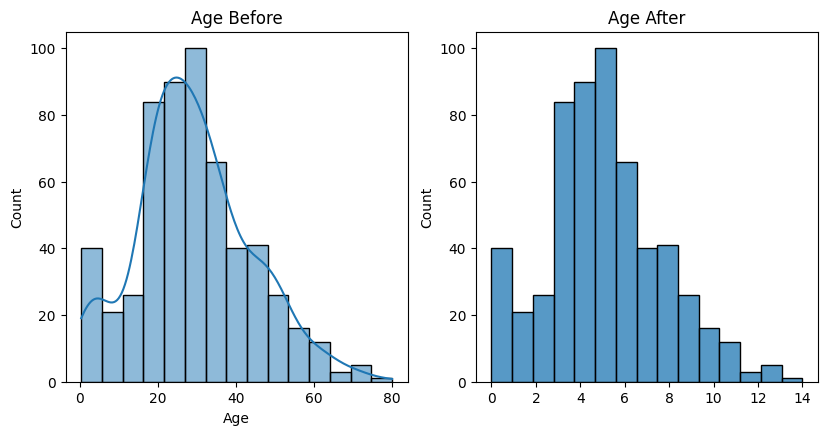

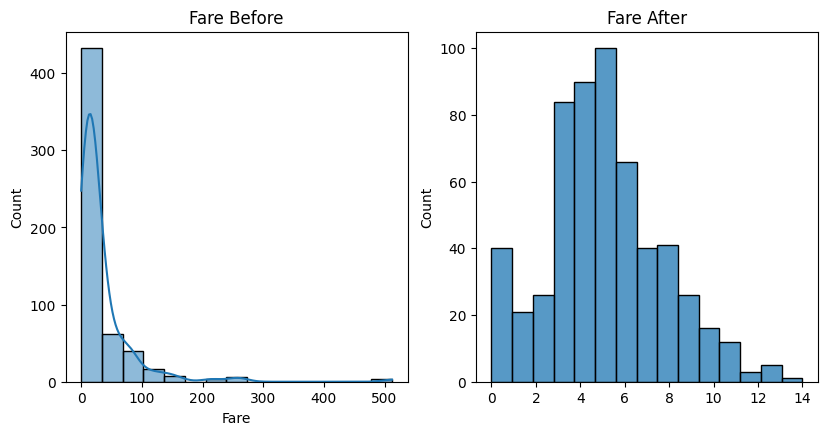

In [44]:
Discritization(df,strategy='uniform',n_bins=15)

CLF : 0.6993006993006993
CV : 0.6331181533646323


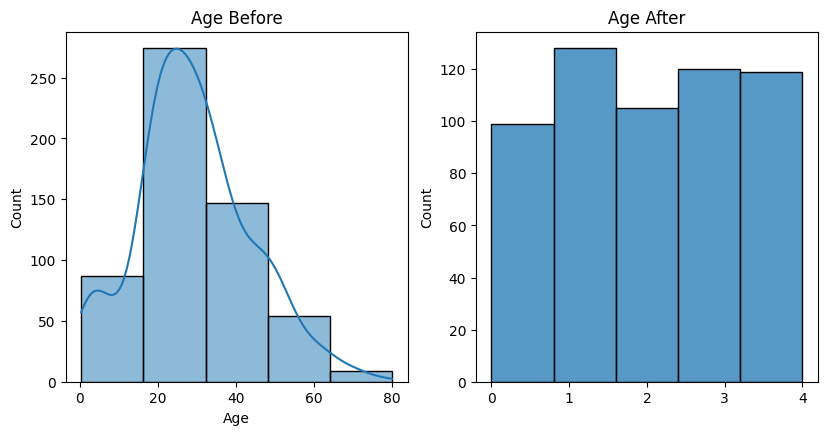

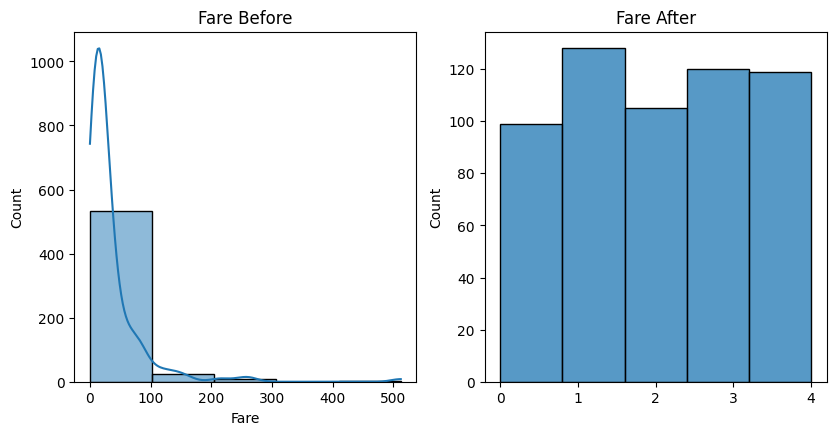

In [45]:
Discritization(df,strategy='quantile',n_bins=5)

CLF : 0.6503496503496503
CV : 0.6275234741784037


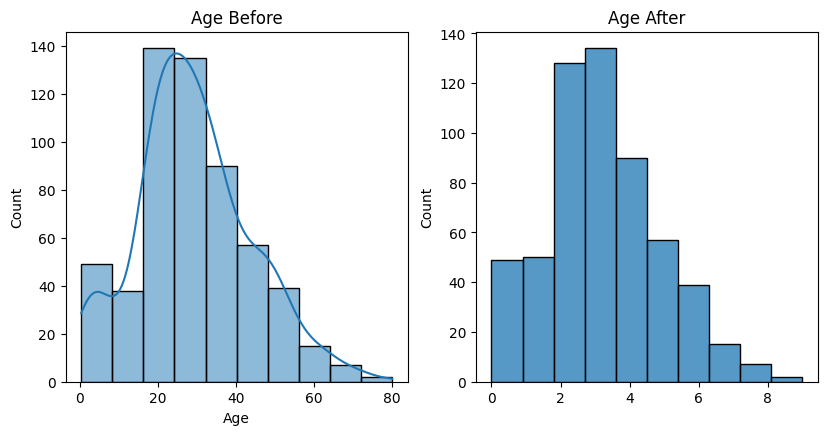

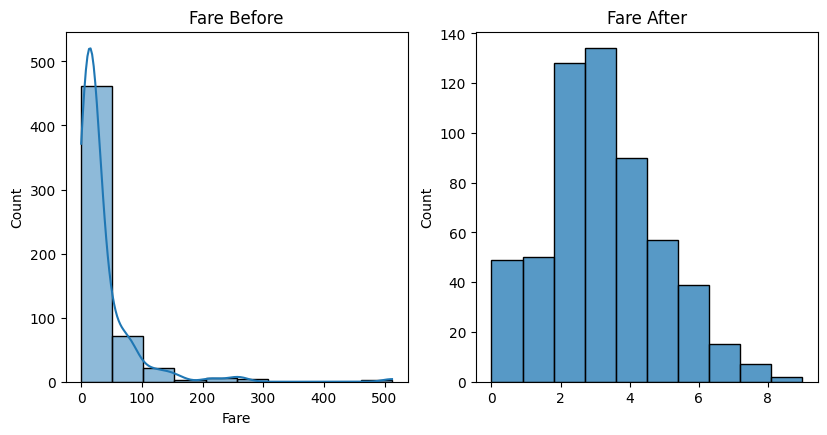

In [46]:
Discritization(df,strategy='kmeans',n_bins=10)